In [87]:
import pandas as pd
from google.colab import files

file = files.upload()
data = pd.read_csv('melb_data.csv')

Saving melb_data.csv to melb_data (2).csv


**Exploratory Data Analysis**

In [88]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [89]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [90]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

**Missing Values**

In [91]:
missing_column = data.isnull().sum()
missing_column

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [92]:
data.isnull().mean() * 100

,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,0.000000
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.000000
Postcode,0.000000


Terdapat persentase yang cukup besar pada kolom "BuildingArea" sebesar 47 % dan "YearBuilt" sebesar 39% . Dan persentase yang cukup kecil pada kolom "Car" sebesar 4% dan kolom "CouncilArea" sebesar 10%.

In [120]:
cols_to_drop = ['Address','Price']

**Handle Missing Values**

In [121]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=cols_to_drop)
y = data['Price']

TrainX, ValX, TrainY, ValY = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

In [122]:
numeric_features = TrainX.select_dtypes(include=['int64','float64']).columns
categorical_features = TrainX.select_dtypes(include=["object"]).columns

**Preprocessing Pipeline**

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [124]:
from sklearn.preprocessing  import OneHotEncoder

categorical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('OneHot', OneHotEncoder(handle_unknown='ignore'))
])

In [125]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transform,numeric_features),
        ('cat', categorical_transform,categorical_features)
    ]
)

In [126]:
TrainXNew = preprocessor.fit_transform(TrainX)
ValXNew = preprocessor.transform(ValX)

**Mutual Information**

In [127]:
TrainXMI = preprocessor.fit_transform(TrainX)

feature_name_num = numeric_features
feature_name_cat = preprocessor.named_transformers_['cat'] \
    .named_steps['OneHot'] \
    .get_feature_names_out(categorical_features)

feature_names = list(feature_name_num) + list(feature_name_cat)


In [128]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

mi_scores = mutual_info_regression(
    TrainXMI , TrainY, random_state=42
)

mi_series = pd.Series(mi_scores, index=feature_names)
mi_series = mi_series.sort_values(ascending=False)

mi_series

,0
Propertycount,0.394322
Postcode,0.369847
Distance,0.276406
Rooms,0.232192
Bedroom2,0.213567
...,...
Suburb_Seaholme,0.000000
Date_8/10/2016,0.000000
Date_6/08/2016,0.000000
Suburb_Beaconsfield,0.000000


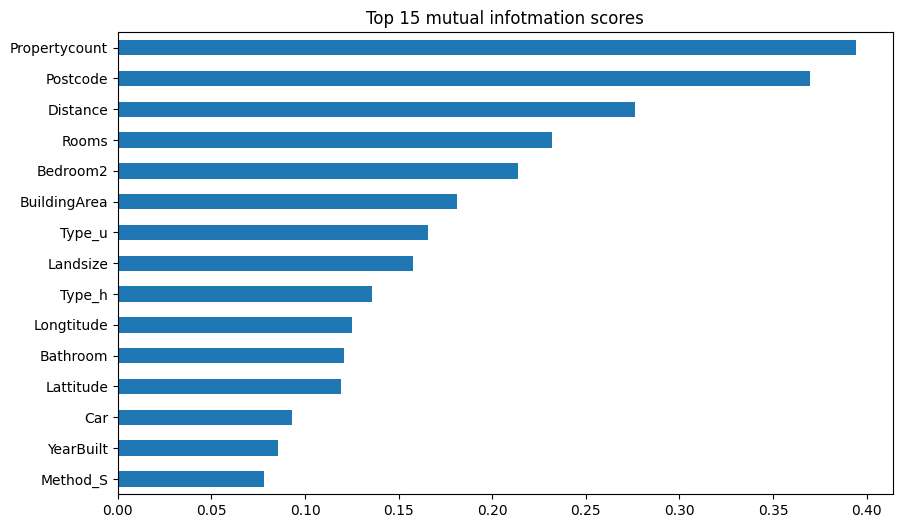

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
mi_series.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 mutual infotmation scores")
plt.show()

**Baseline Model**


In [130]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

linreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',LinearRegression())
])

In [131]:
from sklearn.model_selection import cross_val_score
import numpy as np

rmse_scores = -cross_val_score(
    linreg_model, TrainX,TrainY,
    scoring='neg_root_mean_squared_error',
    cv=5
)

print("linear regression RMSE:")
print("Mean:", rmse_scores.mean())
print("Std:", rmse_scores.std())

linear regression RMSE:
Mean: 410024.02484085766
Std: 54391.56908901036


In [132]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,random_state=42,n_jobs=-1
    ))
])

In [133]:
rf_rmse = -cross_val_score(
    rf_model, TrainX,TrainY,
    scoring='neg_root_mean_squared_error',
    cv=5,n_jobs=-1
)

print("random forest RMSE:")
print("Mean:", rf_rmse.mean())
print("Std :", rf_rmse.std())

random forest RMSE:
Mean: 294095.7944576531
Std : 26832.926873025368


In [134]:
from sklearn.metrics import mean_squared_error

rf_model.fit(TrainX,TrainY)
y_pred = rf_model.predict(ValX)

rmse_test = np.sqrt(mean_squared_error(ValY, y_pred))
print("test RMSE:", rmse_test)

test RMSE: 283784.61514912965


**Feature Selection(MODEL-BASED)**

In [135]:
import pandas as pd
rf_model.fit(TrainX,TrainY)

important = rf_model.named_steps['model'].feature_importances_

feature_names =(
    list(numeric_features) + list(
         rf_model.named_steps['preprocessor']
        .named_transformers_['cat']
        .named_steps['OneHot']
        .get_feature_names_out(categorical_features)
    )
)

FeatureImportant = pd.Series(important,index=feature_names).sort_values(
    ascending=False
)

FeatureImportant.head(15)

,0
Regionname_Southern Metropolitan,0.208582
Rooms,0.164436
Distance,0.132148
Type_u,0.088939
Landsize,0.076121
Longtitude,0.046653
BuildingArea,0.042202
Lattitude,0.029053
Bathroom,0.028195
YearBuilt,0.018890


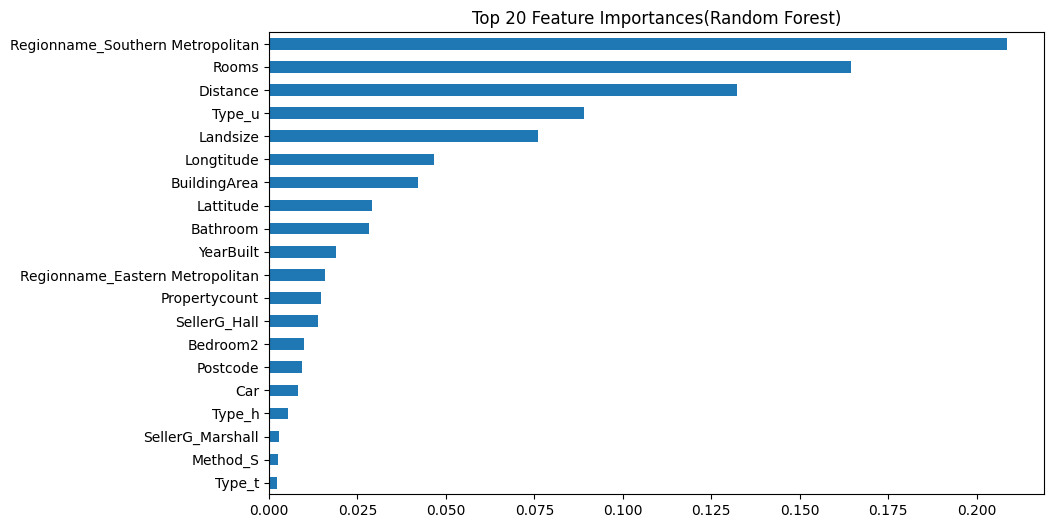

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
FeatureImportant.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances(Random Forest)")
plt.show()
